<a href="https://colab.research.google.com/github/jscortesg/Uniandes-MetodosComputacionales-2022-01/blob/main/Semana8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio 2

Considere un oscilador forzado-amortiguado de la forma

\begin{align}
F_{k} &= - kx, \\
F_{r} &= -bv, \\
F_{ext} &= F_{0}\cos \omega t. 
\end{align}

Obtenga la solución gráfica para $x(t)$ tomando en cuenta los valores de los siguientes parámetros:

\begin{align}
&m=\text{1 kg, }b =\text{0.25 kg/s, }k = \text{2 N/m, }F_{0} = \text{2.5 N} \\
&\omega = 0.5,\,1,\,2,\,2.5\text{ rad/s} \\
&x(0) = 1\text{ m, }v_{0} = 0\text{ m/s}
\end{align}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

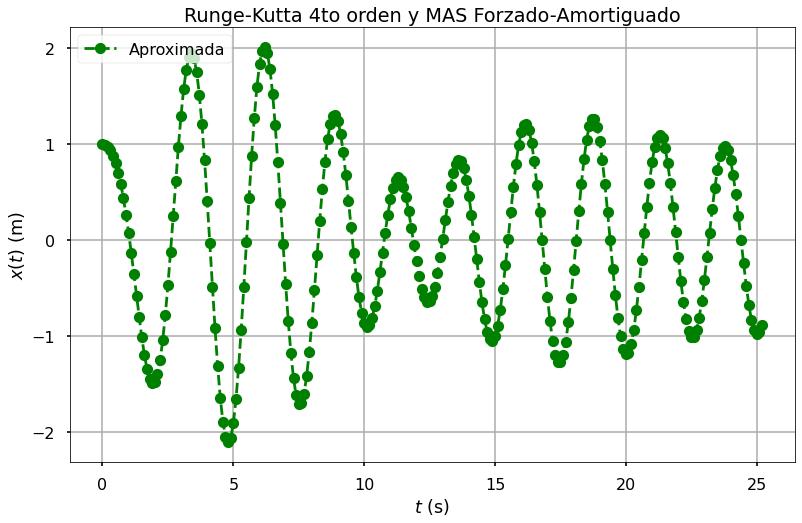

In [ ]:
F2_oa = lambda t, v_oa2, x_oa2: -pow(w,2)*x_oa2 - b*v_oa2 + 2.5*np.cos(2.5*t)

w = 2
b = 0.25
h = 0.1 # Step size
t = np.arange(0, 8*np.pi + h, h) # Numerical grid
x0_oa2 = 1 
v0_oa2 = 0
# Initial Conditions

x_oa2 = np.zeros(len(t))
v_oa2 = np.zeros(len(t))

x_oa2[0] = x0_oa2
v_oa2[0] = v0_oa2

for i in range(0, len(t) - 1):
    k1v = h*F2_oa(t[i], v_oa2[i], x_oa2[i]) 
    k1x = h*v_oa2[i] 
    k2v = h*F2_oa(t[i] + 0.5*h, v_oa2[i] + 0.5*k1v, x_oa2[i] + 0.5*k1x)
    k2x = h*(v_oa2[i] + 0.5*k1v)
    k3v = h*F2_oa(t[i] + 0.5*h, v_oa2[i] + 0.5*k2v, x_oa2[i] + 0.5*k2x)
    k3x = h*(v_oa2[i] + 0.5*k2v)
    k4v = h*F2_oa(t[i] + h, v_oa2[i] + k3v, x_oa2[i] + k3x)
    k4x = h*(v_oa2[i] + k3v)
    v_oa2[i + 1] = v_oa2[i] + (1/6)*(k1v + 2*k2v + 2*k3v +k4v)
    x_oa2[i + 1] = x_oa2[i] + (1/6)*(k1x + 2*k2x + 2*k3x +k4x)

plt.figure(figsize = (13, 8))
plt.plot(t, x_oa2, 'go--', label='Aproximada')
#plt.plot(t, np.cos(2*t), color = 'black', label='Exacta')
plt.title('Runge-Kutta 4to orden y MAS Forzado-Amortiguado')
plt.xlabel('$t$ (s)')
plt.ylabel('$x(t)$ (m)')
plt.grid()
plt.legend(loc='upper left')
plt.show()

#Python Solvers - Problemas con condiciones iniciales

Ecuación a resolver:

\begin{align}
\frac{dS}{dt} &= \cos t. \\
S(0) &= 0.
\end{align}

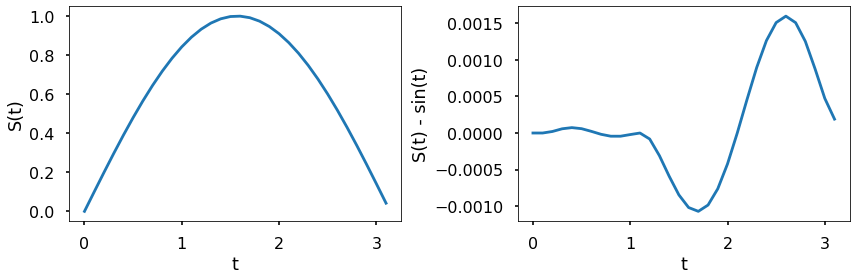

In [ ]:
from scipy.integrate import solve_ivp

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval) #(Función ec. dif., intervalo integración, condición inicial, intervalo donde almacena sol.)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

Ejemplo: circuito RL 

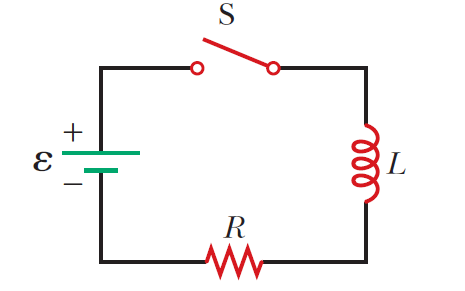

$R = 9\,\Omega$, $L = 7\text{ H}$, $\xi = \text{120 V}$. Condición inicial: $I(0) = 0$.

Ecuación diferencial:

\begin{align}
\sum_{i}\Delta V_{i} &= \xi - RI - L\frac{dI}{dt} = 0 \\
L\frac{dI}{dt} &= \xi - RI \\
\frac{dI}{dt} &= \frac{\xi}{L} - \frac{R}{L}I \\
&\text{Para este caso, } \\
F(t,I(t)) &= \frac{\xi}{L} - \frac{R}{L}I.
\end{align}

Text(0, 0.5, '$I$ (A)')

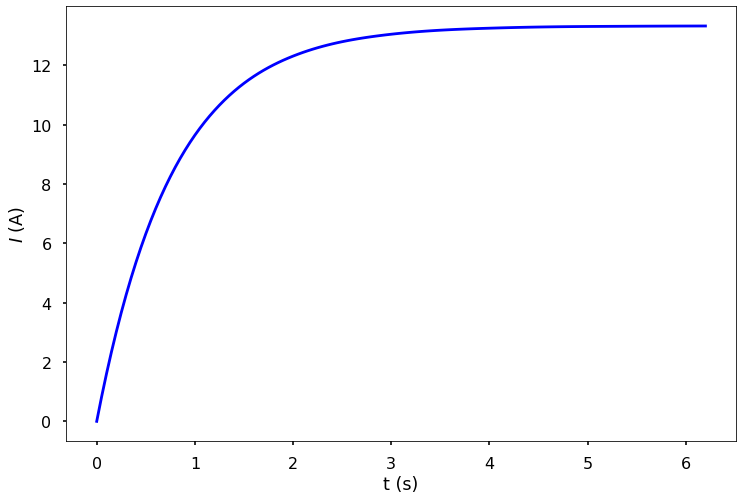

In [ ]:
F_RL = lambda t, Irl: (xi/L) - (R*Irl)/L

R = 9
L = 7
xi = 120
tau = L/R

t_eval = np.arange(0, 8*tau, 0.05)

sol_RL = solve_ivp(F_RL, [0, 8*tau], [0], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol_RL.t, sol_RL.y[0], color = 'blue')
plt.xlabel('t (s)')
plt.ylabel('$I$ (A)')

Ecuaciones diferenciales de orden superior:

(tomado de https://www.epythonguru.com/2020/07/second-order-differential-equation.html)

\begin{align}
&\frac{d^{2}y}{dx^{2}} + 5\frac{dy}{dx} +7 = 0 \\
&y(0) = 21,\,y'(0) = 12 \\
&\text{Intervalo: }x\in[0,5] \\
&\text{ } \\
&\text{ }\\
&\frac{d^{2}y}{dx^{2}} = -5\frac{dy}{dx} -7 \\
&\frac{dy}{dx} = z \Rightarrow\,\frac{d^{2}y}{dx^{2}} = z' \\
&z' = -5z - 7
\end{align}

Vector: 

\begin{equation}
\begin{pmatrix}
y \\
z
\end{pmatrix}
=
\begin{pmatrix}
u_{0} \\
u_{1}
\end{pmatrix}
\end{equation}

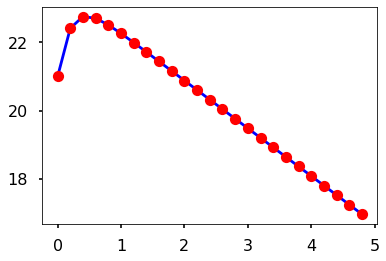

In [ ]:
from scipy.integrate import odeint

def f1(u,x):
  return (u[1], -5*u[1] - 7)

y0 = [21, 12] #condiciones iniciales

x = np.arange(0,5,0.2)
us = odeint(f1,y0,x) #integración de ec. difs.

ys = us[:,0]

plt.figure()
plt.plot(x,ys, 'b-')
plt.plot(x,ys, 'ro')

#Problemas con condiciones de frontera

Condiciones iniciales para $S(t)$: $S(0),\,S'(0),\,S''(0),\cdots$

Condiciones de frontera: 

\begin{align}
&y^{(n)}(x) = F(x,y(x),y^{(1)}(x),y^{(2)}(x),\cdots,y^{(n-1)}(x)) \\
&x\in a\leq x\leq b.
\end{align}

P. ej., para una 2da derivada, $y(a),\,y(b)$ ó $y^{(1)}(a),\,y^{(1)}(b)$ ó $y(a),\,y^{(1)}(b)$.

Método shooting:

\begin{equation}
\text{Problema con condiciones de frontera }\rightarrow\text{ Problema con condiciones iniciales}
\end{equation}

Ejemplo:

Movimiento vertical de un proyectil con $y(0)=0$, $y(5)=50\text{ m}$. $y'(0) = v_{0}=??$.

\begin{align}
y^{''}& = -g,\,y'' = v' \\
\text{Sistema de ecuaciones: } \\
y^{'} &= v  \\
v' & = -g
\end{align}

Sea $S(t) = (y,\,v)$. $S'(t) = (y',v') = (v,-g)$. 

En forma matricial,

\begin{equation}
\begin{pmatrix}
y' \\
v'
\end{pmatrix}
=
\begin{pmatrix}
0 & 1 \\
0 & -g/v
\end{pmatrix}
\begin{pmatrix}
y \\
v
\end{pmatrix}
\end{equation}

Primer intento: $y'(0) = v_{0} = 25$

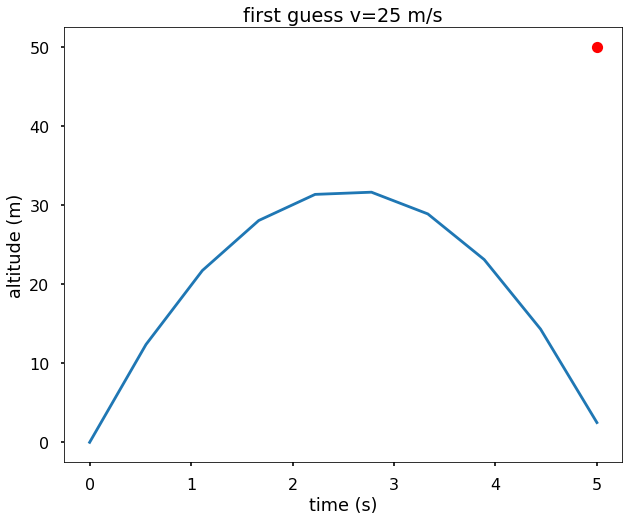

In [ ]:
F = lambda t, s: \
  np.dot(np.array([[0,1],[0,-9.8/s[1]]]),s)

t_span = np.linspace(0, 5, 100)
y0 = 0
v0 = 25
t_eval = np.linspace(0, 5, 10)
sol = solve_ivp(F, [0, 5], \
                [y0, v0], t_eval = t_eval)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'first guess v={v0} m/s')
plt.show()

Segundo intento: $y'(0) = v_{0} = 40$ m/s

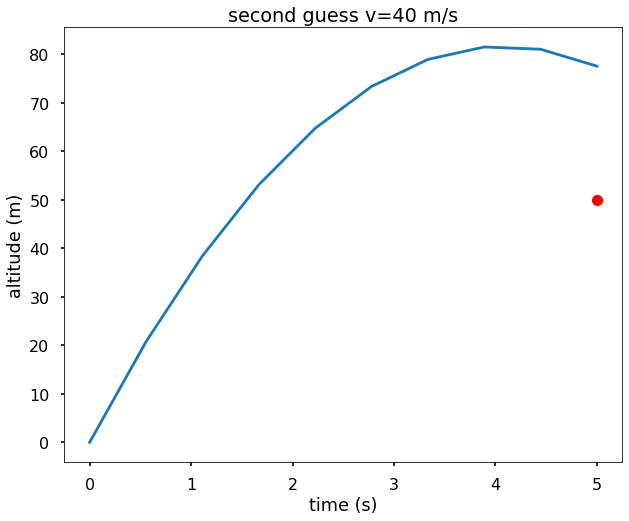

In [ ]:
v0 = 40
sol = solve_ivp(F, [0, 5], \
            [y0, v0], t_eval = t_eval)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'second guess v={v0} m/s')
plt.show()

In [ ]:
from scipy.optimize import fsolve

def objective(v0):
    sol = solve_ivp(F, [0, 5], \
            [y0, v0], t_eval = t_eval)
    y = sol.y[0]
    return y[-1] - 50

v0, = fsolve(objective, 10)
print(v0)

34.499999999999986


/usr/local/lib/python3.7/dist-packages/scipy/integrate/_ivp/base.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y0 = np.asarray(y0)


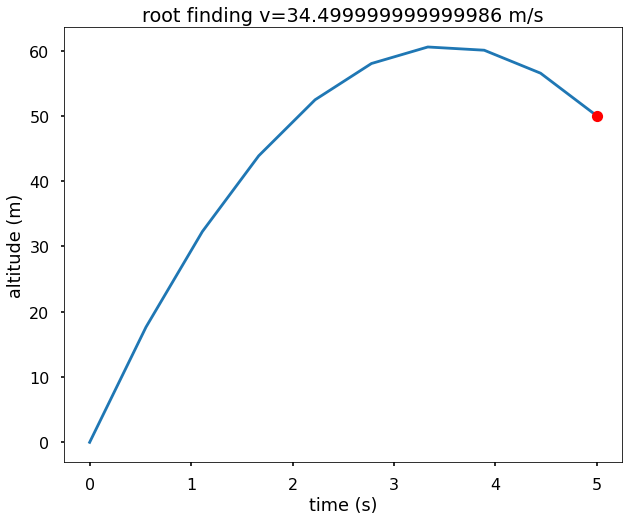

In [ ]:
sol = solve_ivp(F, [0, 5], \
            [y0, v0], t_eval = t_eval)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'root finding v={v0} m/s')
plt.show()